KeyboardInterrupt: 

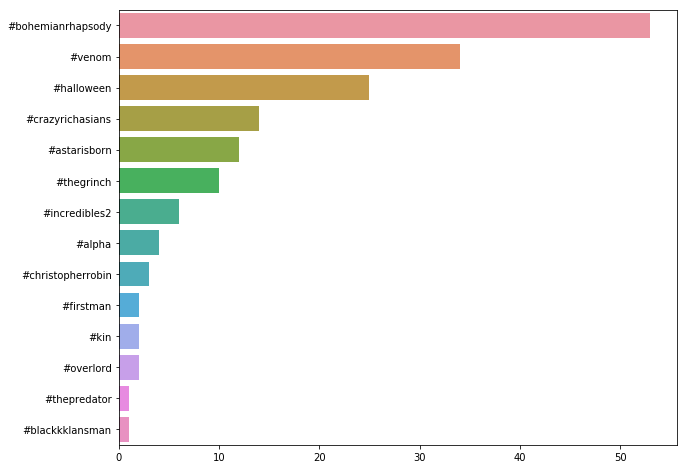

In [1]:
from kafka import KafkaConsumer, TopicPartition
import matplotlib.pyplot as plt
import seaborn as sns
import schedule
import time
%matplotlib inline

def getMovies():
    consumer = KafkaConsumer(bootstrap_servers='localhost:9092',
                                     auto_offset_reset='earliest',
                                     consumer_timeout_ms=1000)
    consumer.subscribe(['tweets_analysis'])
    words = [(msg.value.decode('utf-8').split(" ")[0],int(msg.value.decode('utf-8').split(" ")[1])) for msg in consumer]
    word_name, word_frequency = zip(*words)
    word_name = list(word_name)
    word_frequency = list(word_frequency)
    num_titles = len(set(word_name))
    titles = zip(word_name[-num_titles:], word_frequency[-num_titles:])
    sortList =sorted(titles, key=lambda x: x[1],reverse=True)
    word_name, word_frequency = zip(*sortList)
    word_name = list(word_name)
    word_frequency = list(word_frequency)
    titles = word_name[-num_titles:]
    title_freq = word_frequency[-num_titles:]
    ##plot part of the list (first 29 values)

    plt.figure( figsize = ( 10, 8 ) )
    #sns.barplot( x=[item['count'] for item in msg.value[:29]], y=[item['word'] for item in msg.value[:29]])
    sns.barplot( x= title_freq , 
                y = titles)

getMovies()

schedule.every(5).seconds.do(getMovies)

while 1:
    schedule.run_pending()
    time.sleep(1)